Plots: BorderScatter
====================

This example illustrates how to customize the border of plotted data.

A border is the `Grid2D` of (y,x) coordinates at the centre of every pixel at the border of a mask. A border is defined
as a pixel that is on an exterior edge of a mask (e.g. it does not include the inner pixels of an annular mask).

The `BorderScatter` object serves the purpose is allowing us to uniquely customize the appearance of any border on
a plot.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets load an example Hubble Space Telescope image of a real strong lens as an `Array2D`.

In [2]:
dataset_path = path.join("dataset", "slacs", "slacs1430+4105")
image_path = path.join(dataset_path, "image.fits")
image = al.Array2D.from_fits(file_path=image_path, hdu=0, pixel_scales=0.03)

We will also need a mask whose border we will plot on the figure, which we associate with the image.

In [3]:
mask = al.Mask2D.circular_annular(
    shape_native=image.shape_native,
    pixel_scales=image.pixel_scales,
    inner_radius=0.3,
    outer_radius=3.0,
    sub_size=image.sub_size,
)
masked_image = al.Array2D.manual_mask(array=image.native, mask=mask)

The `Array2D` includes a its border as an internal property, meaning we can plot it via an `Include2D` object.

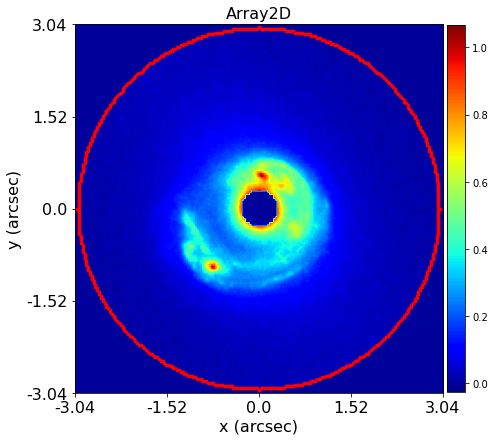

In [4]:
include_2d = aplt.Include2D(border=True)
array_plotter = aplt.Array2DPlotter(array=masked_image, include_2d=include_2d)
array_plotter.figure()

The appearance of the border is customized using a `BorderScatter` object.

To plot the border this object wraps the following matplotlib method:

 https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html

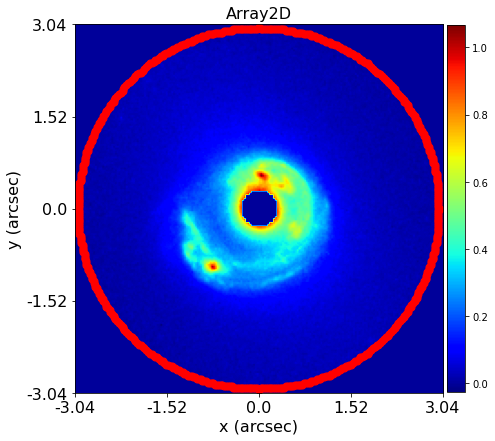

In [5]:
border_scatter = aplt.BorderScatter(marker="o", c="r", s=50)

mat_plot_2d = aplt.MatPlot2D(border_scatter=border_scatter)

array_plotter = aplt.Array2DPlotter(
    array=masked_image, mat_plot_2d=mat_plot_2d, include_2d=include_2d
)
array_plotter.figure()

To plot the border manually, we can pass it into a` Visuals2D` object.

This means we don't need to create the `masked_image` array we used above.

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numba/core/ir_utils.py:2067: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'slim_indexes' of function 'furthest_grid_2d_slim_index_from'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../PyAutoArray/autoarray/structures/grids/two_d/grid_2d_util.py", line 673:
@decorator_util.jit()
def furthest_grid_2d_slim_index_from(
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


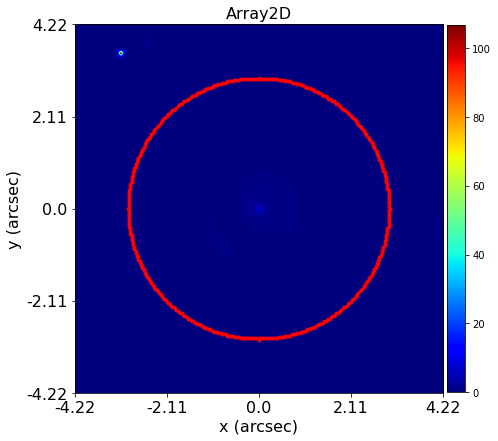

In [6]:
visuals_2d = aplt.Visuals2D(border=mask.border_grid_1d)

array_plotter = aplt.Array2DPlotter(array=image, visuals_2d=visuals_2d)
array_plotter.figure()

Finish.